In [1]:
import pickle as pkl

with open("/home/export/ajshen/ada-sbi-cosmic-rays/results/full_priors_restrict_azimuth_uniform_test_limit_cal_no_shift_fmpe_all_train_data_posterior_ts_0/sbi_train_summary", "rb") as f:
    train_summary = pkl.load(f)

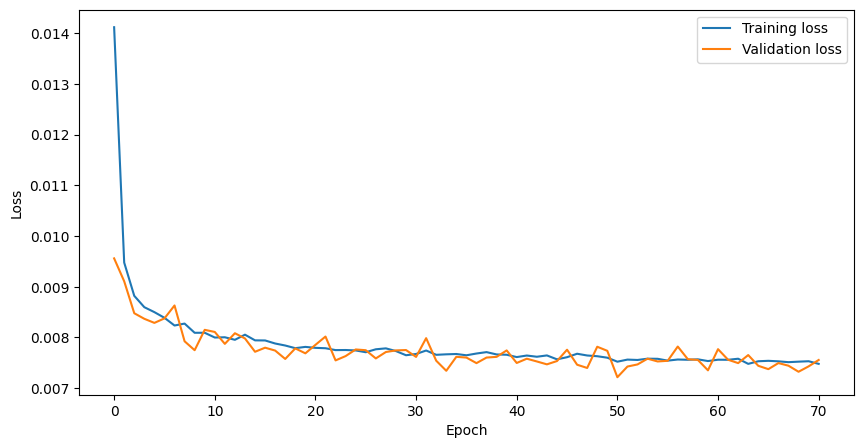

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(train_summary['training_loss'], label='Training loss')
ax.plot(train_summary['validation_loss'], label='Validation loss')
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.legend()


In [1]:
import shutil
import glob

for f in glob.glob("many_examples/*.png"):
    raw_filename = f.split("/")[-1]
    parts = raw_filename.split("_")
    energy = float(parts[2][1:])
    if energy < 3.5:
        shutil.copy(f, f"many_examples_sorted/low_energies/{raw_filename}") 
    elif energy < 5:
        shutil.copy(f, f"many_examples_sorted/mid_energies/{raw_filename}")
    else:
        shutil.copy(f, f"many_examples_sorted/high_energies/{raw_filename}")
    print(f)

many_examples/sets_3775_E3.13_Z0.65_A-1.55.png
many_examples/posterior_3775_E3.13_Z0.65_A-1.55.png
many_examples/sets_4676_E3.08_Z0.68_A-0.83.png
many_examples/posterior_4676_E3.08_Z0.68_A-0.83.png
many_examples/sets_880_E3.07_Z0.65_A0.00.png
many_examples/posterior_880_E3.07_Z0.65_A0.00.png
many_examples/sets_238_E3.09_Z0.72_A0.67.png
many_examples/posterior_238_E3.09_Z0.72_A0.67.png
many_examples/sets_2359_E3.07_Z0.67_A1.51.png
many_examples/posterior_2359_E3.07_Z0.67_A1.51.png
many_examples/sets_6413_E3.15_Z0.82_A-1.42.png
many_examples/posterior_6413_E3.15_Z0.82_A-1.42.png
many_examples/sets_1801_E3.08_Z0.77_A-0.67.png
many_examples/posterior_1801_E3.08_Z0.77_A-0.67.png
many_examples/sets_1540_E3.15_Z0.79_A0.07.png
many_examples/posterior_1540_E3.15_Z0.79_A0.07.png
many_examples/sets_434_E3.07_Z0.83_A0.78.png
many_examples/posterior_434_E3.07_Z0.83_A0.78.png
many_examples/sets_1438_E3.09_Z0.81_A1.53.png
many_examples/posterior_1438_E3.09_Z0.81_A1.53.png
many_examples/sets_167_E3.09

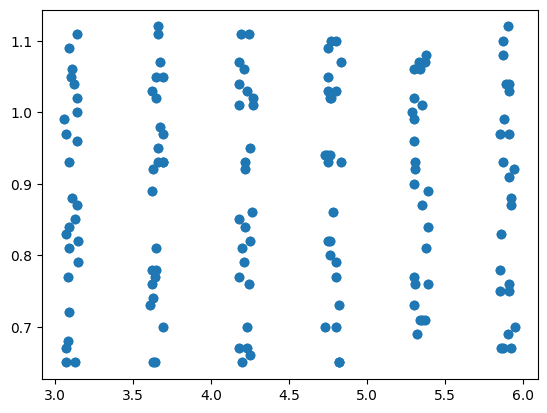

In [4]:
import configs 
import glob
import numpy as np
import matplotlib.pyplot as plt
import torch

config_name = "full_priors_restrict_azimuth_uniform_test_limit_cal_no_shift_fmpe_all_train_data_waldo_ts"
config = configs.config_dict[config_name]

ez = list()
for f in glob.glob("many_examples/*.png"):
    raw_filename = f.split("/")[-1]
    parts = raw_filename.split("_")
    energy = float(parts[2][1:])
    zenith = float(parts[3][1:])
    ez.append((energy, zenith))

ez = np.array(ez)

lower = config.eval_param_mins + torch.tensor([.1, 0.05, 0.05])
upper = config.eval_param_maxes - torch.tensor([.1, 0.05, 0.05])
figures_param_grid = torch.cartesian_prod(
    torch.linspace(lower[0], upper[0], 6),
    torch.linspace(lower[1], upper[1], 5),
    torch.linspace(lower[2], upper[2], 5)
)

fig, ax = plt.subplots()
ax.scatter(ez[:, 0], ez[:, 1])

In [2]:
precomputed_weighters = [None, None, None]

Param Weight Bins: 100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


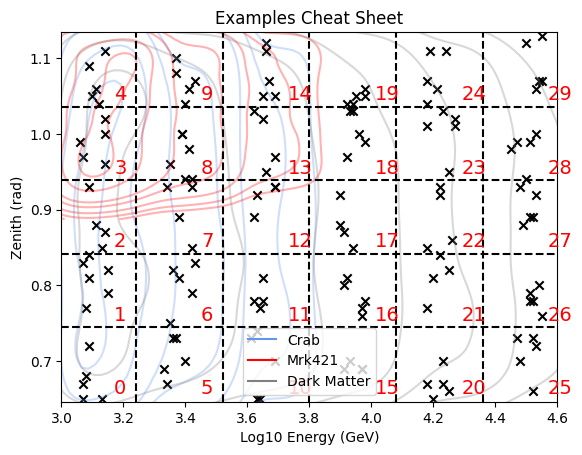

In [ ]:
import os
import shutil
import glob
import util
import plotting 
import numpy as np
import torch
import matplotlib.pyplot as plt



file_list = glob.glob("many_examples/*.png")
config_prefix = "REDUCED_GRID"
model_name = "FM"
test_statistic = "WALDO"
config_name = "full_priors_restrict_azimuth_uniform_test_limit_cal_no_shift_fmpe_all_train_data_waldo_ts"

config, out_dir, model, test_ds, qr, qr_data, filtered_manifest, unfiltered_manifest = util.load_config_data(
    config_name,
    manual_device="cuda:0"
)
config.eval_param_maxes = torch.tensor([
    4.6,
    config.eval_param_maxes[1],
    config.eval_param_maxes[2]
])

ez = list()
for f in file_list:
    raw_filename = f.split("/")[-1]
    parts = raw_filename.split("_")
    energy = float(parts[2][1:])
    zenith = float(parts[3][1:])
    ez.append((energy, zenith))
file_list = np.array(file_list)

ez = np.array(ez)

def ndsnap_regular(points, *grid_axes):         
    snapped = []                                         
    for i, ax in enumerate(grid_axes):                                   
        diff = ax[:, np.newaxis] - points[:, i]
        best = np.argmin(np.abs(diff), axis=0)                                                                                                  
        snapped.append(ax[best])                                                                                           
    return np.array(snapped).T

lower = config.eval_param_mins + torch.tensor([.1, 0.05, 0.05])
upper = config.eval_param_maxes - torch.tensor([.1, 0.05, 0.05])
energy_grid = np.linspace(lower[0], upper[0], 6)
zenith_grid = np.linspace(lower[1], upper[1], 5)
energy_grid_midpoints = (energy_grid[1:] + energy_grid[:-1]) / 2
zenith_grid_midpoints = (zenith_grid[1:] + zenith_grid[:-1]) / 2

snapped = ndsnap_regular(
    ez, 
    energy_grid, 
    zenith_grid
)

fig, ax = plt.subplots()
legend = plotting.plot_priors(
    ax, 
    unfiltered_manifest,
    filtered_manifest,
    precomputed_weighters=precomputed_weighters,
    skip_mrk=False,
    x_axis="log10_energy", 
    y_axis="zenith",
    num_samples=10_000
)
ax.scatter(ez[:, 0], ez[:, 1], marker='x', color='black')
ax.set_xlim(config.eval_param_mins[0], config.eval_param_maxes[0])
ax.set_ylim(config.eval_param_mins[1], config.eval_param_maxes[1])

for energy in energy_grid_midpoints:
    ax.axvline(energy, color='black', linestyle='--')

for zenith in zenith_grid_midpoints:
    ax.axhline(zenith, color='black', linestyle='--')

# Iterate over cartesian product of energy and zenith grid
i = 0
out_dir = "many_examples_gridded"

for energy, zenith in torch.cartesian_prod(
    torch.tensor(energy_grid), 
    torch.tensor(zenith_grid)
):
    save_dir = f"{out_dir}/{config_prefix}/{model_name}/{test_statistic}/{i:02}/"
    ax.text(energy + 0.07, zenith - 0.04, str(i), fontsize=14, color='red')
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    mask = (snapped[:, 0] == energy.item()) & (snapped[:, 1] == zenith.item())
    for f in file_list[mask]:
        shutil.copy(f, f"{save_dir}/{f.split('/')[-1]}")

    i += 1


with open(f"{out_dir}/{config_prefix}/{model_name}/{test_statistic}/{config_name}.name", "wb") as f:
    pass
ax.set_xlabel("Log10 Energy (GeV)")
ax.set_ylabel("Zenith (rad)")
ax.set_title("Examples Cheat Sheet")
fig.savefig(f"{out_dir}/{config_prefix}/{model_name}/{test_statistic}/observations.png", bbox_extra_artists=(legend,))

In [1]:
import util

config_name = "full_priors_restrict_azimuth_uniform_test_limit_cal_no_shift_fmpe_all_train_data_waldo_ts"
config, out_dir, model, test_ds, qr, qr_data, filtered_manifest, unfiltered_manifest = util.load_config_data(
    config_name,
    manual_device="cuda:0"
)

2024-12-02 16:17:42.342985: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-02 16:17:42.343049: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-02 16:17:42.344838: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-02 16:17:42.352883: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-02 16:17:44.095588: W tensorflow/compiler/tf2

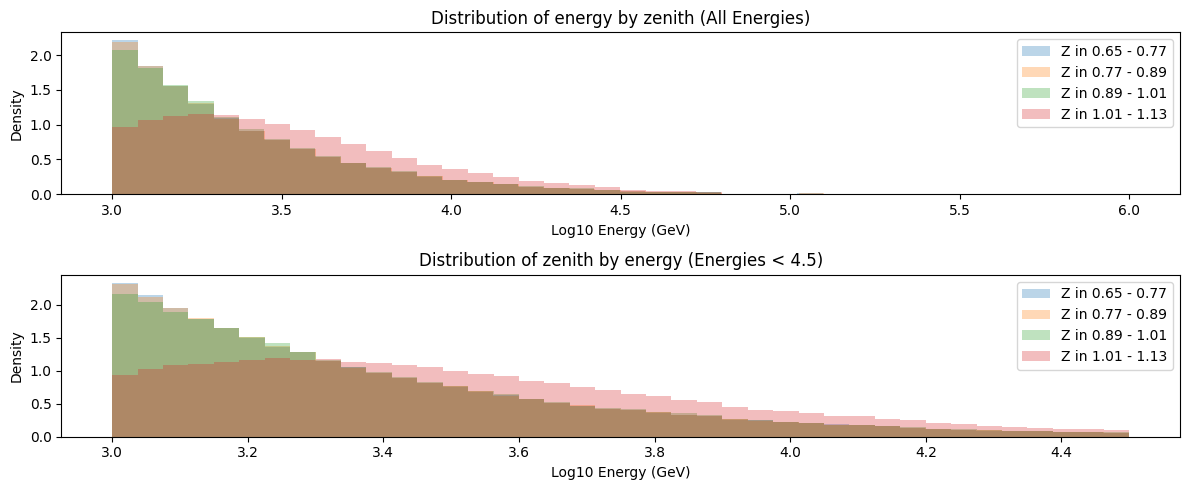

In [4]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

with open(f"{out_dir}/train_manifest.pkl", "rb") as f:
    train_manifest = pkl.load(f)

fig, ax = plt.subplots(2, 1, figsize=(12, 5))

zenith_bin_edges = np.linspace(config.eval_param_mins[1], config.eval_param_maxes[1], 5)

for i, (zenith_lower, zenith_upper) in enumerate(zip(zenith_bin_edges[:-1], zenith_bin_edges[1:])):
    mask = (train_manifest["zenith"] >= zenith_lower) & (train_manifest["zenith"] < zenith_upper)
    ax[0].hist(train_manifest["log10_energy"][mask], bins=40, density=True, alpha = 0.3, label=f"Z in {zenith_lower:.2f} - {zenith_upper:.2f}")

    energy_mask = train_manifest["log10_energy"] < 4.5
    ax[1].hist(train_manifest["log10_energy"][mask & energy_mask], bins=40, density=True, alpha = 0.3, label=f"Z in {zenith_lower:.2f} - {zenith_upper:.2f}")

ax[0].set_title(f"Distribution of energy by zenith (All Energies)")
ax[0].legend()
ax[0].set_xlabel("Log10 Energy (GeV)")
ax[0].set_ylabel("Density")

ax[1].set_title(f"Distribution of zenith by energy (Energies < 4.5)")
ax[1].legend()
ax[1].set_ylabel("Density")
ax[1].set_xlabel("Log10 Energy (GeV)")


# ax[0, i].set_yscale("log")
fig.tight_layout()